In [1]:
import numpy as np
import scipy as sp
import networkx as nx
import matplotlib.pyplot as plt

import itertools as it
import time
import random

The Watts-Strogatz model is a random graph model characterised by small-world properties such as short average path length and high clustering coefficient. The small-world phenomenon refers to the case that in many real-world networks, the standard distance between nodes remains unusually small despite the network growing very large.

To construct a Watts-Strogatz graph, we first set up a ring lattice with n vertices where each vertex is connected to 2k nearest vertices, with k neighbours on each side. Then, every edge is rewired with probability p by replacing (ni; nj), where i < j, with (ni; nk) where k is chosen with uniform from all possible values while avoiding self-loops and vertex duplication.

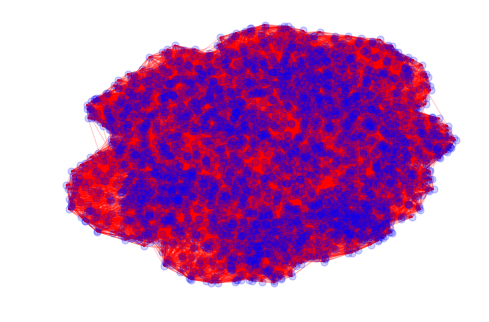

In [2]:
W = nx.watts_strogatz_graph(4039, 44, 0.05)
nx.draw(W, node_size = 50, node_color = 'blue', alpha = 0.2, edge_color = 'red')
plt.show()

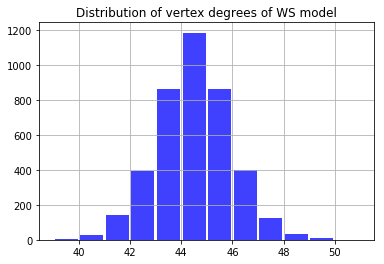

In [3]:
plt.hist(list(dict(nx.degree(W)).values()), 
         bins = np.arange(np.min(list(dict(nx.degree(W)).values())),
                          1 + np.max(list(dict(nx.degree(W)).values()))),
         facecolor='blue', alpha=0.75, rwidth = 0.9)
plt.title('Distribution of vertex degrees of WS model')
plt.grid(True)
plt.show()

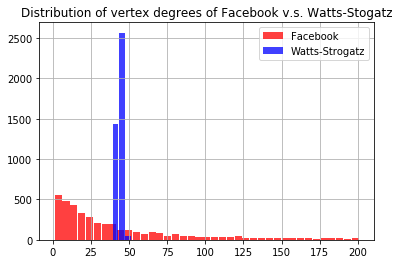

In [4]:
FbData = np.loadtxt("facebook_combined.txt.gz")
FbData = FbData.astype(int)

#We load the facebook data
FbData = np.loadtxt("facebook_combined.txt.gz")
FbData = FbData.astype(int)

#We plot the facebook data graph
H = nx.Graph()
H.add_edges_from(FbData)
plt.show()

Hvertex_degrees=list(dict(nx.degree(H)).values())
plt.hist(Hvertex_degrees, bins = np.linspace(np.min(Hvertex_degrees),201, 40), facecolor='red', label = 'Facebook', alpha=0.75, rwidth=0.9)

Wvertex_degrees=list(dict(nx.degree(W)).values())
plt.hist(Wvertex_degrees, bins = np.linspace(np.min(Wvertex_degrees),201, 40), facecolor='blue', label = 'Watts-Strogatz', alpha=0.75, rwidth=0.9)

plt.title('Distribution of vertex degrees of Facebook v.s. Watts-Stogatz')

plt.grid(True)
plt.legend(loc = 'upper right')
plt.show()

In [ ]:
print('Watts-Stogatz')
print('|V| = ', nx.number_of_nodes(W))
print('|E| = ', nx.number_of_edges(W))
print('CC = ', nx.average_clustering(W))
print('Average path length = ', nx.average_shortest_path_length(W))
print('Average degree = ', (2*nx.number_of_edges(W)/nx.number_of_nodes(W)))
print('Number of triangles = ', np.trace(np.matrix((nx.adj_matrix(W).todense()**3))/6))
print('Diameter = ', nx.diameter(W))

print('')

print('Facebook')
print('|V| = ', nx.number_of_nodes(H))
print('|E| = ', nx.number_of_edges(H))
print('CC = ', nx.average_clustering(H))
print('Average path length = ', nx.average_shortest_path_length(H))
print('Average degree = ', (2*nx.number_of_edges(H)/nx.number_of_nodes(H)))
print('Number of triangles = ', np.trace(np.matrix((nx.adj_matrix(H).todense()**3))/6))
print('Diameter = ', nx.diameter(H))

Watts-Stogatz
|V| =  4039
|E| =  88858
CC =  0.6292307252336474
Average path length =  3.2183978620534974
Average degree =  44.0
Number of triangles =  800625.0
Diameter =  5

Facebook
|V| =  4039
|E| =  88234
CC =  0.6055467186200876
Average path length =  3.6925068496963913
Average degree =  43.69101262688784
Number of triangles =  1612010.0


Compared to the Erdos-Renyi Random Model, the Watts-Strogatz model is a better model of the real-world network due to its higher clustering coefficient. This is because two friends are likely to be friends if they have friends in common, hence creating many triangles. Also, this network has a similar average path length and diameter as the Facebook network.  However a limitation to the Watts-Strogatz model is the symmetry of degree distribution. Real networks have skewed degree distributions. 